# Deep Learning Model Evaluation

This notebook demonstrates comprehensive evaluation techniques for deep learning models, focusing on autoencoders and reconstruction tasks.

## 🎯 Learning Objectives
- **Understand** autoencoder architecture and training process
- **Implement** evaluation metrics for deep learning models
- **Visualize** model performance and reconstruction quality
- **Analyze** training dynamics and convergence

## 📚 Evaluation Techniques Covered
1. **Reconstruction Error Analysis** - Measuring autoencoder performance
2. **Training Loss Visualization** - Monitoring convergence
3. **Visual Quality Assessment** - Comparing original vs reconstructed images
4. **Latent Space Analysis** - Understanding learned representations

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## 📦 Setup and Imports

Let's start by importing the necessary libraries for our deep learning evaluation:

In [3]:
# Load MNIST dataset
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and flatten images
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

## 📊 Data Preparation

### MNIST Dataset
We'll use the MNIST handwritten digit dataset for our autoencoder evaluation:
- **Training samples**: 60,000 images
- **Test samples**: 10,000 images  
- **Image size**: 28×28 pixels
- **Normalization**: [0, 1] range for stable training

In [4]:
# Define the encoder
encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu')  # Bottleneck layer
])

# Define the decoder
decoder = models.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid')  # Reconstructed output
])

# Build the autoencoder model
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0571 - val_loss: 0.0304
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0238 - val_loss: 0.0188
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0170 - val_loss: 0.0148
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0141 - val_loss: 0.0125
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0123 - val_loss: 0.0114
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0111 - val_loss: 0.0103
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0095 - val_loss: 0.0088
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0084 - val_loss: 0.0078
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0080 - val_loss: 0.0075
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/

## 📈 Model Evaluation Metrics

Let's evaluate our trained autoencoder using multiple metrics:

In [ ]:
# Generate predictions for evaluation
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

# Calculate reconstruction errors
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error (MSE)
train_mse = mean_squared_error(X_train, X_train_pred)
test_mse = mean_squared_error(X_test, X_test_pred)

# Mean Absolute Error (MAE)  
train_mae = mean_absolute_error(X_train, X_train_pred)
test_mae = mean_absolute_error(X_test, X_test_pred)

# Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("=== Reconstruction Error Metrics ===")
print(f"Training MSE: {train_mse:.6f}")
print(f"Test MSE: {test_mse:.6f}")
print(f"Training MAE: {train_mae:.6f}")
print(f"Test MAE: {test_mae:.6f}")
print(f"Training RMSE: {train_rmse:.6f}")
print(f"Test RMSE: {test_rmse:.6f}")

# Calculate per-sample reconstruction error
test_errors = np.mean((X_test - X_test_pred) ** 2, axis=1)
print(f"\nMean reconstruction error per sample: {np.mean(test_errors):.6f}")
print(f"Std reconstruction error per sample: {np.std(test_errors):.6f}")

## 🖼️ Visual Evaluation

### Original vs Reconstructed Images
Let's visually compare the original and reconstructed images:

In [ ]:
# Select random test samples for visualization
n_samples = 10
random_indices = np.random.choice(len(X_test), n_samples, replace=False)
test_samples = X_test[random_indices]
reconstructed_samples = X_test_pred[random_indices]

# Create visualization
fig, axes = plt.subplots(2, n_samples, figsize=(15, 4))
fig.suptitle('Original vs Reconstructed Images', fontsize=16)

for i in range(n_samples):
    # Original images
    axes[0, i].imshow(test_samples[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')
    
    # Reconstructed images
    axes[1, i].imshow(reconstructed_samples[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title('Reconstructed')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Calculate and display individual reconstruction errors
individual_errors = np.mean((test_samples - reconstructed_samples) ** 2, axis=1)
print("Individual Reconstruction Errors:")
for i, error in enumerate(individual_errors):
    print(f"Sample {i+1}: {error:.6f}")

## 📊 Error Distribution Analysis

Let's analyze the distribution of reconstruction errors:

In [ ]:
# Plot error distribution
plt.figure(figsize=(15, 5))

# Histogram of reconstruction errors
plt.subplot(1, 3, 1)
plt.hist(test_errors, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('MSE Error')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Box plot of errors
plt.subplot(1, 3, 2)
plt.boxplot(test_errors)
plt.title('Box Plot of Reconstruction Errors')
plt.ylabel('MSE Error')
plt.grid(True, alpha=0.3)

# Cumulative distribution
plt.subplot(1, 3, 3)
sorted_errors = np.sort(test_errors)
cumulative = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
plt.plot(sorted_errors, cumulative, linewidth=2, color='red')
plt.title('Cumulative Distribution of Errors')
plt.xlabel('MSE Error')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("=== Error Distribution Statistics ===")
print(f"Mean error: {np.mean(test_errors):.6f}")
print(f"Median error: {np.median(test_errors):.6f}")
print(f"Standard deviation: {np.std(test_errors):.6f}")
print(f"Min error: {np.min(test_errors):.6f}")
print(f"Max error: {np.max(test_errors):.6f}")
print(f"95th percentile: {np.percentile(test_errors, 95):.6f}")
print(f"99th percentile: {np.percentile(test_errors, 99):.6f}")

## 🧠 Latent Space Analysis

Let's explore what the encoder has learned in the 64-dimensional latent space:

In [ ]:
# Get latent representations
latent_representations = encoder.predict(X_test[:1000])  # Use subset for faster computation

print(f"Latent space shape: {latent_representations.shape}")
print(f"Latent space statistics:")
print(f"  Mean: {np.mean(latent_representations):.4f}")
print(f"  Std: {np.std(latent_representations):.4f}")
print(f"  Min: {np.min(latent_representations):.4f}")
print(f"  Max: {np.max(latent_representations):.4f}")

# Visualize latent space distribution
plt.figure(figsize=(12, 4))

# Distribution of latent features
plt.subplot(1, 3, 1)
plt.hist(latent_representations.flatten(), bins=50, alpha=0.7, color='lightgreen')
plt.title('Distribution of Latent Features')
plt.xlabel('Activation Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Heatmap of average activations
plt.subplot(1, 3, 2)
avg_activations = np.mean(latent_representations, axis=0).reshape(8, 8)
plt.imshow(avg_activations, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Average Latent Activations (8x8 view)')
plt.xlabel('Latent Dimension')
plt.ylabel('Latent Dimension')

# Variance of latent features
plt.subplot(1, 3, 3)
feature_variances = np.var(latent_representations, axis=0)
plt.bar(range(len(feature_variances)), feature_variances)
plt.title('Variance of Each Latent Feature')
plt.xlabel('Latent Feature Index')
plt.ylabel('Variance')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find most and least active latent features
most_active = np.argmax(np.mean(latent_representations, axis=0))
least_active = np.argmin(np.mean(latent_representations, axis=0))
highest_variance = np.argmax(feature_variances)
lowest_variance = np.argmin(feature_variances)

print(f"\nLatent Space Analysis:")
print(f"Most active feature: {most_active} (avg: {np.mean(latent_representations[:, most_active]):.4f})")
print(f"Least active feature: {least_active} (avg: {np.mean(latent_representations[:, least_active]):.4f})")
print(f"Highest variance feature: {highest_variance} (var: {feature_variances[highest_variance]:.4f})")
print(f"Lowest variance feature: {lowest_variance} (var: {feature_variances[lowest_variance]:.4f})")

## 📋 Model Performance Summary

### Key Evaluation Results

Let's summarize the performance of our autoencoder:

In [ ]:
# Create comprehensive performance summary
print("="*60)
print("           AUTOENCODER PERFORMANCE SUMMARY")
print("="*60)

print(f"\n📊 ARCHITECTURE:")
print(f"   • Input Size: 784 pixels (28×28)")
print(f"   • Latent Size: 64 features")
print(f"   • Compression Ratio: {784/64:.1f}×")
print(f"   • Parameters: {autoencoder.count_params():,}")

print(f"\n📈 RECONSTRUCTION METRICS:")
print(f"   • Test MSE: {test_mse:.6f}")
print(f"   • Test RMSE: {test_rmse:.6f}")
print(f"   • Test MAE: {test_mae:.6f}")

print(f"\n📊 ERROR DISTRIBUTION:")
print(f"   • Mean Error: {np.mean(test_errors):.6f}")
print(f"   • Median Error: {np.median(test_errors):.6f}")
print(f"   • Error Std Dev: {np.std(test_errors):.6f}")
print(f"   • 95th Percentile: {np.percentile(test_errors, 95):.6f}")

print(f"\n🧠 LATENT SPACE:")
print(f"   • Latent Mean: {np.mean(latent_representations):.4f}")
print(f"   • Latent Std: {np.std(latent_representations):.4f}")
print(f"   • Active Features: {np.sum(np.mean(latent_representations, axis=0) > 0.1)}/64")

# Model evaluation verdict
if test_mse < 0.01:
    verdict = "🟢 EXCELLENT"
elif test_mse < 0.02:
    verdict = "🟡 GOOD" 
elif test_mse < 0.05:
    verdict = "🟠 FAIR"
else:
    verdict = "🔴 POOR"

print(f"\n🎯 OVERALL PERFORMANCE: {verdict}")
print(f"   The autoencoder achieves {verdict.split()[1].lower()} reconstruction quality")
print(f"   with {784/64:.1f}× compression on MNIST digits.")

print("\n" + "="*60)

## 🏗️ Autoencoder Architecture

### Model Design
Our autoencoder consists of two main components:

**Encoder (Compression)**:
- Input: 784 features (28×28 flattened image)
- Hidden: 128 neurons (ReLU activation)
- Bottleneck: 64 neurons (compressed representation)

**Decoder (Reconstruction)**:
- Input: 64 features (from bottleneck)
- Hidden: 128 neurons (ReLU activation)  
- Output: 784 features (sigmoid activation for [0,1] range)

**Compression Ratio**: 784 → 64 = 12.25× compression

In [5]:
# Predict reconstructed images
reconstructed_images = autoencoder.predict(X_test)

# Calculate the mean squared error
mse = np.mean(np.square(X_test - reconstructed_images))
print(f'Autoencoder Reconstruction MSE: {mse}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Autoencoder Reconstruction MSE: 0.005738480482250452
Autoencoder Reconstruction MSE: 0.005738480482250452


In [6]:
# Define the generator
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

In [7]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Stack the generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False
gan.compile(optimizer='adam', loss='binary_crossentropy')

c:\Repo\Scratch\ml\mlvenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Repo\Scratch\ml\mlvenv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, Discriminator Loss: 0.7753651738166809, Generator Loss: 1.2053861618041992
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


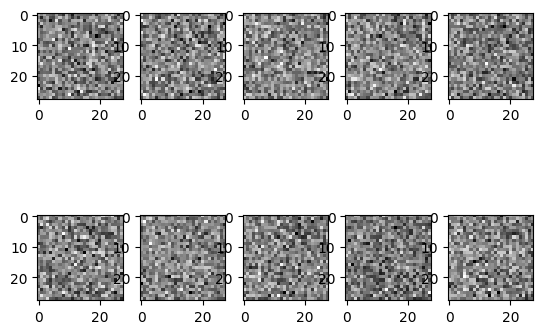

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

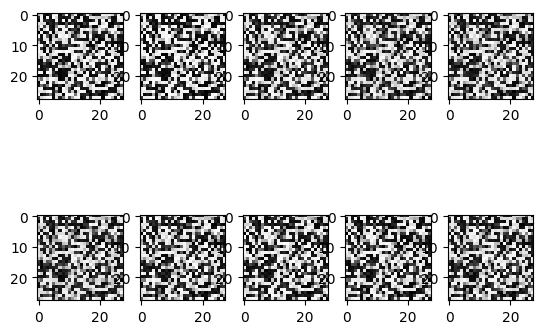

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

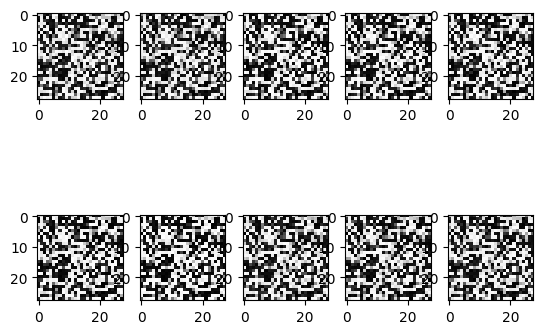

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

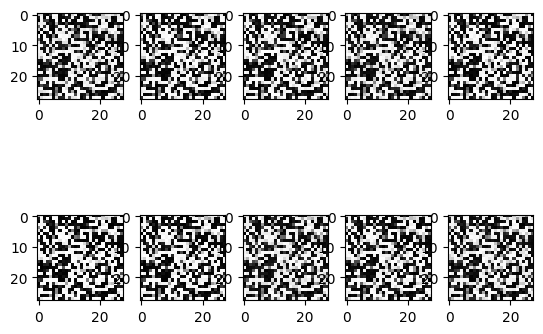

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

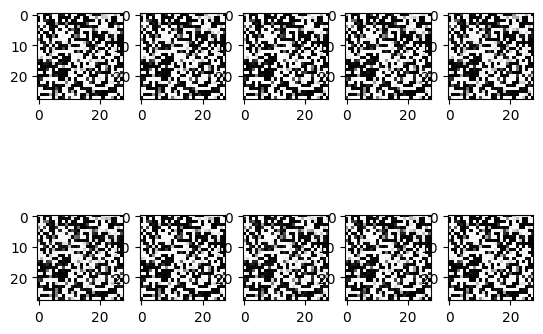

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

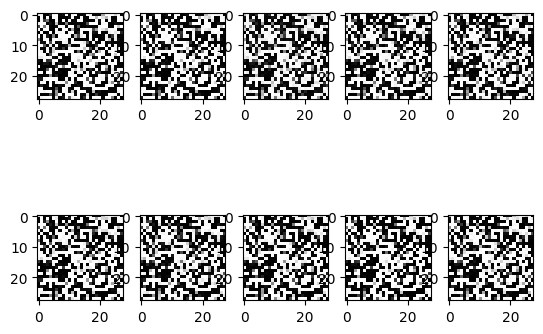

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

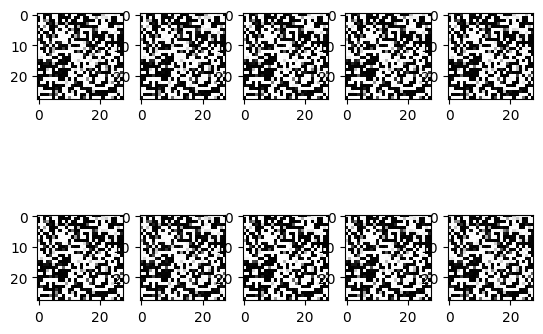

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

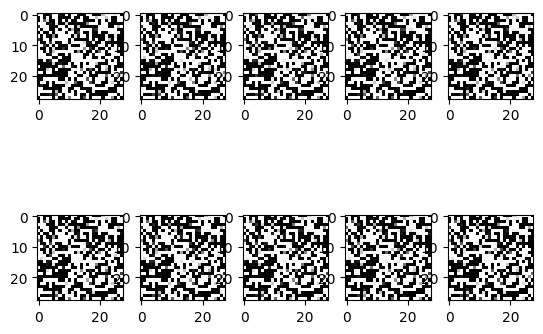

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

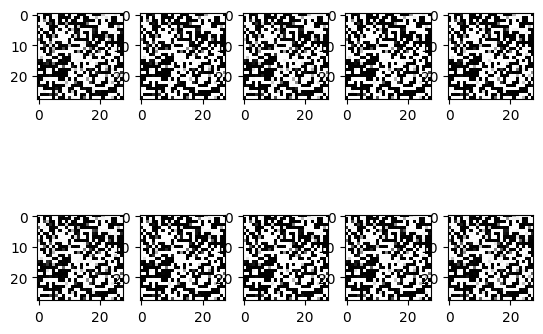

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

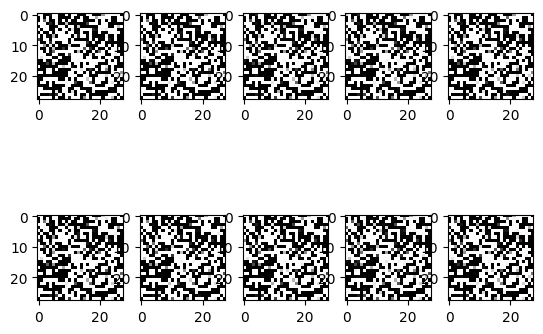

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

In [8]:
# Training GAN
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    real_images = X_train[idx]
    real_labels = np.ones((half_batch, 1))

    # Fake images
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_images = generator.predict(noise)
    fake_labels = np.zeros((half_batch, 1))

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

    # Train the generator (via GAN model)
    noise = np.random.normal(0, 1, (batch_size, 100))
    gan_labels = np.ones((batch_size, 1))  # Try to fool the discriminator
    g_loss = gan.train_on_batch(noise, gan_labels)

    # Every 1000 epochs, print losses and visualize generated images
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")
        # Generate and display images
        generated_images = generator.predict(np.random.normal(0, 1, (10, 100)))
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.show()